**REPÉRAGE DES ÉTIQUETAGES UNIQUES**


In [ ]:
import pandas as pd
spacy_df = pd.read_csv('/content/SPACY_data.csv',sep = '\t')
gold_df = pd.read_csv('/content/Spacy_output_GOLD.csv',sep = '\t')

# récupération des données de chaque colonne par le biais de l'affectation
token = spacy_df['text']
pos = spacy_df['POS']
token_GOLD = gold_df['text']
pos_GOLD = gold_df['POS']

# à l'aide de la fonction unique(), on extrait toutes les étiquettes possibles
étiquetage = gold_df['POS'].unique()
étiquetage

array(['NUM', 'VERB', 'ADJ', 'PUNCT', 'PRON', 'AUX', 'ADP', 'NOUN', 'DET',
       'CCONJ', 'ADV', 'SPACE', 'PROPN', 'SCONJ', nan, 'PREP', 'INT'],
      dtype=object)

**REMPLISAGE DE LA MATRICE DE CONFUSION SANS FORMATAGE**

In [ ]:
import numpy as np
from numpy import nan  # afin de définir la valeur spéciale nan

GOLD_étiquettes = pos_GOLD.tolist()
SPACY_étiquettes = pos.tolist()

# Copier-coller la liste des étiquettes avant qui se diffèrent l'un et l'autre
étiquettes = ['NUM', 'NOUN', 'ADJ', 'PUNCT', 'PRON', 'AUX', 'ADP', 'DET', 'VERB','CCONJ', 'ADV', 'SPACE', 'PROPN', 'SCONJ', nan,'PREP','X','INT']
# Créer une matrice de confusion vide
matrice_de_confusion = np.zeros((len(étiquettes), len(étiquettes)))

# Remplir la matrice de confusion par le bais du parcours des tuples
for GOLD_étiquettes, SPACY_étiquettes in zip(GOLD_étiquettes, SPACY_étiquettes):
    # Récupérer l'index de l'étiquette correspondante
    GOLD_index = étiquettes.index(GOLD_étiquettes)
    SPACY_index = étiquettes.index(SPACY_étiquettes)
    # Incrémenter le compteur de la case correspondante de la matrice de confusion
    matrice_de_confusion[GOLD_index][SPACY_index] += 1

# matrice de confusion plutôt moche obtenue
y_true = matrice_de_confusion[:, 0]
y_pred = matrice_de_confusion[:, 1]
y_pred

array([  0., 166.,   1.,   0.,   3.,   0.,   1.,   0.,  13.,   4.,   2.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [ ]:
# Calculer la micromoyenne
total_TP = np.sum(matrice_de_confusion.diagonal())
total_FN = np.sum(matrice_de_confusion, axis=1) - np.diagonal(matrice_de_confusion)
total_FP = np.sum(matrice_de_confusion, axis=0) - np.diagonal(matrice_de_confusion)

total_FN

array([ 1.,  2.,  7.,  1., 15.,  1.,  2.,  2., 23.,  4.,  7.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, average_precision_score,precision_score,f1_score,recall_score

print('------Weighted------')
print('Weighted precision', precision_score(y_true, y_pred, average='weighted'))
print('Weighted recall', recall_score(y_true, y_pred, average='weighted'))
print('Weighted f1-score', f1_score(y_true, y_pred, average='weighted'))
print('------Macro------')
print('Macro precision', precision_score(y_true, y_pred, average='macro'))
print('Macro recall', recall_score(y_true, y_pred, average='macro'))
print('Macro f1-score', f1_score(y_true, y_pred, average='macro'))
print('------Micro------')
print('Micro precision', precision_score(y_true, y_pred, average='micro'))
print('Micro recall', recall_score(y_true, y_pred, average='micro'))
print('Micro f1-score', f1_score(y_true, y_pred, average='micro'))

------Weighted------
Weighted precision 0.8080808080808081
Weighted recall 0.5555555555555556
Weighted f1-score 0.6584362139917694
------Macro------
Macro precision 0.11363636363636363
Macro recall 0.078125
Macro f1-score 0.09259259259259257
------Micro------
Micro precision 0.5555555555555556
Micro recall 0.5555555555555556
Micro f1-score 0.5555555555555556


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is 

In [ ]:
# Calculer la micromoyenne
total_TP = np.sum(matrice_de_confusion.diagonal())
total_FN = np.sum(matrice_de_confusion, axis=1) - np.diagonal(matrice_de_confusion)
total_FP = np.sum(matrice_de_confusion, axis=0) - np.diagonal(matrice_de_confusion)
total_TN = np.sum(matrice_de_confusion) - total_TP - total_FN - total_FP

precision_micro = total_TP / (total_TP + total_FP)
rappel_micro = total_TP / (total_TP + total_FN)
f_mesure_micro = 2 * (precision_micro * rappel_micro) / (precision_micro + rappel_micro)

print("Micromoyenne :")
print("Précision : ", precision_micro)
print("Rappel : ", rappel_micro)
print("F-mesure : ", f_mesure_micro)

# Calculer la macromoyenne
precision_macro = np.mean(np.diagonal(matrice_de_confusion) / np.sum(matrice_de_confusion, axis=0))
rappel_macro = np.mean(np.diagonal(matrice_de_confusion) / np.sum(matrice_de_confusion, axis=1))
f_mesure_macro = 2 * (precision_macro * rappel_macro) / (precision_macro + rappel_macro)

print("\nMacromoyenne :")
print("Précision : ", precision_macro)
print("Rappel : ", rappel_macro)
print("F-mesure : ", f_mesure_macro)

Micromoyenne :
Précision :  [0.99910714 0.97900262 0.99643811 1.         1.         0.9937833
 0.99821588 0.99026549 0.99643811 1.         0.99643811 1.
 0.9937833  1.         1.         1.         0.9973262  1.        ]
Rappel :  [0.99910714 0.99821588 0.9937833  0.99910714 0.98677249 0.99910714
 0.99821588 0.99821588 0.97985989 0.99643811 0.9937833  1.
 1.         1.         1.         0.99910714 1.         0.99910714]
F-mesure :  [0.99910714 0.9885159  0.99510894 0.99955337 0.99334221 0.99643811
 0.99821588 0.99422479 0.98807947 0.99821588 0.99510894 1.
 0.99688196 1.         1.         0.99955337 0.99866131 0.99955337]

Macromoyenne :
Précision :  nan
Rappel :  nan
F-mesure :  nan


<ipython-input-7-5870481bcd06>:17: RuntimeWarning: invalid value encountered in true_divide
  precision_macro = np.mean(np.diagonal(matrice_de_confusion) / np.sum(matrice_de_confusion, axis=0))
<ipython-input-7-5870481bcd06>:18: RuntimeWarning: invalid value encountered in true_divide
  rappel_macro = np.mean(np.diagonal(matrice_de_confusion) / np.sum(matrice_de_confusion, axis=1))


**AFFICHAGE SOUS FORME DE HEATMAP ET PERSONNALISATION**

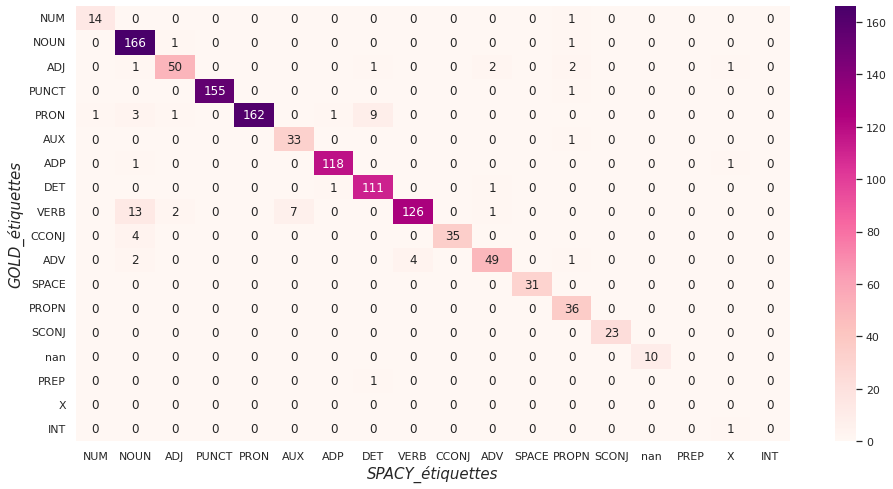

In [ ]:
import seaborn as sns  # permettre de personnaliser facilement les graphiques produits
import matplotlib.pyplot as plt

# Créer une figure et un axe avec une taille de figure personnalisée 
fig, ax = plt.subplots(figsize=(16, 8))

# Adapter la matrice de confusion à une carte de chaleur(heatmap) avec les propriétés esthétiques
sns.set()
sns.heatmap(matrice_de_confusion, annot=True, fmt='g', cmap='RdPu')

# Ajouter et personnaliser les étiquettes 
ax.set_xticklabels(étiquettes)
ax.set_yticklabels(étiquettes,rotation = 'horizontal')

# Nommer des axes et définir le style
plt.xlabel('SPACY_étiquettes',style = 'oblique',fontsize = '15')
plt.ylabel('GOLD_étiquettes',rotation = 'vertical',style = 'oblique',fontsize = '15')

# Sauvegarder de la figure au format PNG
plt.savefig('spacy.png', dpi=300, bbox_inches='tight')

# Afficher le graphique
plt.show()
